In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [67]:
df = pd.read_csv('california_housing_train.csv')
y_T = np.array(df['median_house_value'])
arr = np.array(df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

x_T = arr.T



In [68]:
def loss(y_pred, y_true):
    n = len(y_pred)
    mse = (1/n) * np.sum((y_true - y_pred)**2)
    return mse


In [69]:
def y_prediction(x,a,b):
      y_pred =np.dot( x,a) + b
      m,n = x.shape
      assert(y_pred.shape == (m,))
      return y_pred

In [70]:
def gradient(x,a,b,y_true):
  
  m,n = x.shape
  yp = y_prediction(x,a,b)
    
  da = (2/m)* np.dot(x.T, (yp - y_true))
  db =  (2/m)*np.sum(yp - y_true)



  assert(da.shape ==(n,))
  return (da,db)

In [71]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs=10):

  m,n = x.shape
  loss_mse = []                                 
  a = np.random.normal(0, 0.5, size = (n,)) * np.sqrt(2/n)     
  b = 0

  for i in range(epochs):
    da, db = gradient(x, a, b, y_true)   
    a = a- da*learning_rate
    b = b - db*learning_rate
    y_pred = y_prediction(x, a, b)
    l_mse = loss(y_pred, y_true)
    loss_mse.append(l_mse)
    print("Epoch ",i+1," Completed!","loss = ",l_mse) 


  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

In [84]:
epochs = 100
learn_rate = 0.04
train_loss,a,b = gradient_descent(x_T, y_T, learn_rate, epochs)


Epoch  1  Completed! loss =  48717710839.9712
Epoch  2  Completed! loss =  42199969039.046684
Epoch  3  Completed! loss =  36683956707.63273
Epoch  4  Completed! loss =  32013299191.963955
Epoch  5  Completed! loss =  28056957025.248486
Epoch  6  Completed! loss =  24704668313.616558
Epoch  7  Completed! loss =  21863433652.8188
Epoch  8  Completed! loss =  19454705094.297245
Epoch  9  Completed! loss =  17412086193.89076
Epoch  10  Completed! loss =  15679424128.782852
Epoch  11  Completed! loss =  14209214187.810492
Epoch  12  Completed! loss =  12961259202.140226
Epoch  13  Completed! loss =  11901540101.42924
Epoch  14  Completed! loss =  11001262823.753218
Epoch  15  Completed! loss =  10236053276.972624
Epoch  16  Completed! loss =  9585276956.377445
Epoch  17  Completed! loss =  9031463701.647142
Epoch  18  Completed! loss =  8559821223.650581
Epoch  19  Completed! loss =  8157823628.113478
Epoch  20  Completed! loss =  7814863326.145726
Epoch  21  Completed! loss =  7521956533.

Loss on test data =  5249946381.232872


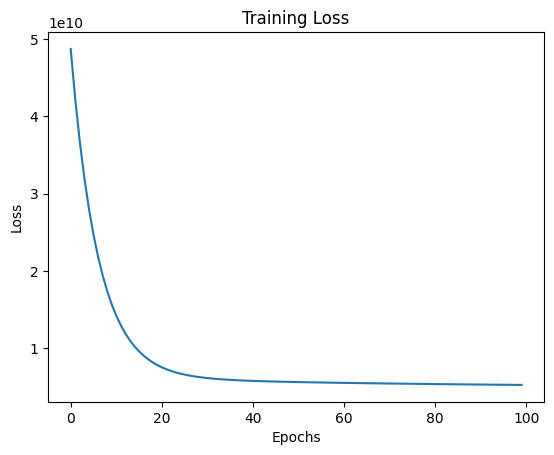

In [85]:
test_df = pd.read_csv("california_housing_test.csv")

arr = np.array(test_df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_test = np.array(test_df['median_house_value'])                                                                                                            # extract the price column from data

x_test = arr.T
y_pred_test = y_prediction(x_test, a, b)
test_loss = loss(y_pred_test, y_test)

print("Loss on test data = ",test_loss)
plt.plot([i for i in range(epochs)], train_loss)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


